In [1]:
import pandas as pd

# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('pickle/data_clean_r4.pkl')
data_clean

,content
0,so sorry to tell you that you have stage ovari...
1,if you buy something through link on this page...
2,cluster of more than pneumonia in the central ...
3,at hong international airport are being for my...
4,the finding that the outbreak of viral pneumon...
...,...
55532,good morning said the government had only ever...
55533,forward his future at despite talk that is con...
55534,the deal agreed by new jersey new york and isl...
55535,around the world have seen major and amid the ...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(stop_words='english',
                                   norm='l1', # ELL - ONE
                                   use_idf=False)
tfidf = tfidf_vectorizer.fit_transform(data_clean.content)

In [21]:
import pickle

kmeans = KMeans(n_clusters=2).fit(tfidf)
pickle.dump(kmeans, open("pickle/kmeans.pkl", "wb"))

In [10]:
lines_for_predicting = ["tf and idf is awesome!", "so sorry to tell you that you have stage two cancer"]
kmeans.predict(tfidf_vectorizer.transform(lines_for_predicting))

array([0, 0], dtype=int32)

In [16]:
# get the first vector out (for the first document)
first_vector_tfidfvectorizer=tfidf[0]
 
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
my,0.574563
cancer,0.311175
and,0.246626
me,0.211389
the,0.197347
...,...
foil,0.000000
fogle,0.000000
foghorn,0.000000
foggy,0.000000


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [15]:
data = pd.read_pickle('pickle/data_clean_r4.pkl')
data.head()

,content
0,so sorry to tell you that you have stage ovari...
1,if you buy something through link on this page...
2,cluster of more than pneumonia in the central ...
3,at hong international airport are being for my...
4,the finding that the outbreak of viral pneumon...


In [71]:
tfidf = TfidfVectorizer(
    min_df = .3,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(data.content)
text = tfidf.transform(data.content)

In [72]:
text.shape

(55537, 36)

Fit 500 clusters
Fit 1000 clusters
Fit 1500 clusters
Fit 2000 clusters
Fit 2500 clusters
Fit 3000 clusters
Fit 3500 clusters
Fit 4000 clusters
Fit 4500 clusters
Fit 5000 clusters
Fit 5500 clusters
Fit 6000 clusters


/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=6500. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=6500. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=6500. Setting it to 3*k
  init_size=init_size)


Fit 6500 clusters


/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=7000. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=7000. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=7000. Setting it to 3*k
  init_size=init_size)


Fit 7000 clusters


/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=7500. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=7500. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=7500. Setting it to 3*k
  init_size=init_size)


Fit 7500 clusters


/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=8000. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=8000. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=8000. Setting it to 3*k
  init_size=init_size)


Fit 8000 clusters


/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=8500. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=8500. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=8500. Setting it to 3*k
  init_size=init_size)


Fit 8500 clusters


/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=9000. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=9000. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=9000. Setting it to 3*k
  init_size=init_size)


Fit 9000 clusters


/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=9500. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=9500. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=9500. Setting it to 3*k
  init_size=init_size)


Fit 9500 clusters


/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=10000. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=10000. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=6144 should be larger than k=10000. Setting it to 3*k
  init_size=init_size)


Fit 10000 clusters


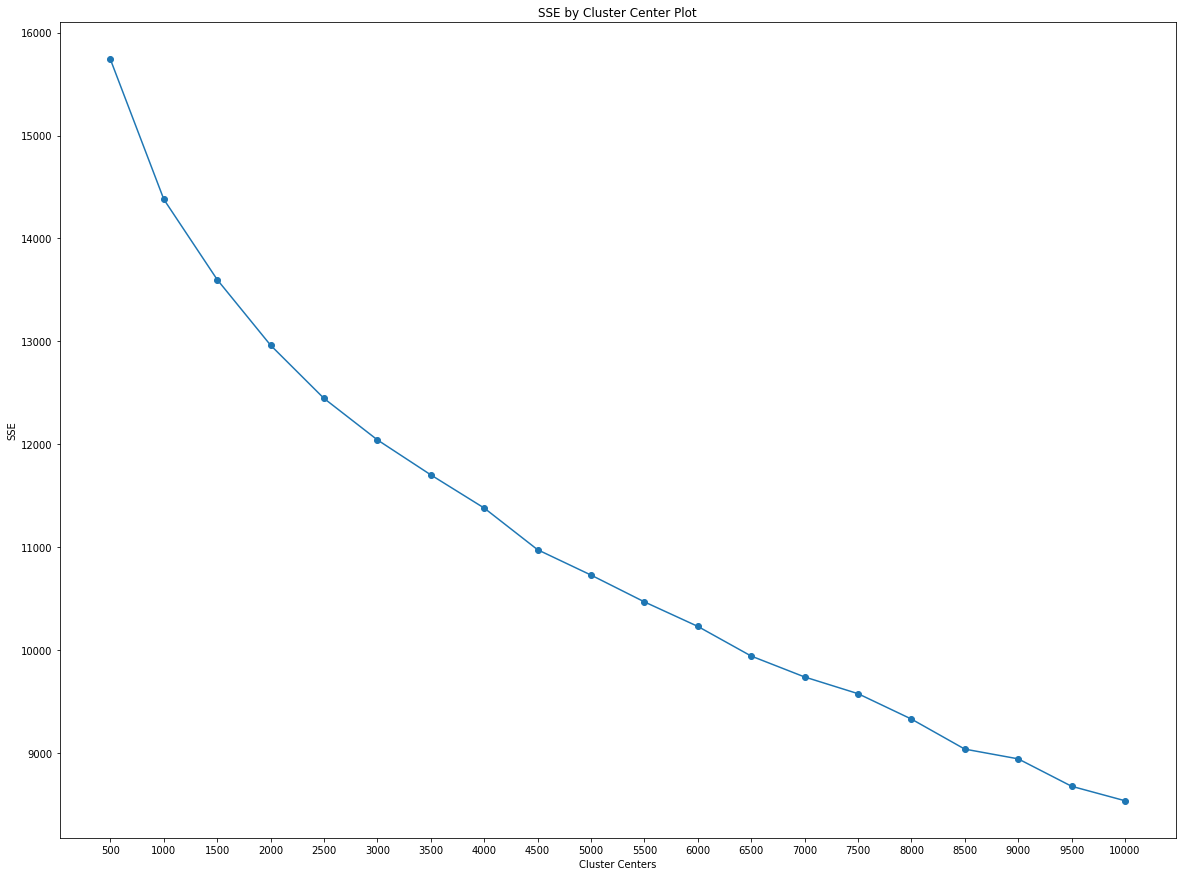

In [78]:
def find_optimal_clusters(data, max_k, start_k=2, k_step=2):
    iters = range(start_k, max_k+1, k_step)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k,
                                   #init_size=1024,
                                   batch_size=2048,
                                   random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1, figsize=(20,15))
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 10000, 500, 500)

In [79]:
clusters = MiniBatchKMeans(n_clusters=8500, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=1024 should be larger than k=8500. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=1024 should be larger than k=8500. Setting it to 3*k
  init_size=init_size)
/Users/tobiaskarentiuskromanndahl/.py-env/covid-19-research/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=1024 should be larger than k=8500. Setting it to 3*k
  init_size=init_size)


In [80]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=36 with svd_solver='full'

In [81]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
work,outbreak,make,come,march,coronavirus,public,time,new,use

Cluster 1
year,coronavirus,pandemic,public,world,government,people,said,crisis,told

Cluster 2
daily,government,historic,express,said,order,home,newspaper,need,crisis

Cluster 3
health,number,virus,home,coronavirus,new,day,million,people,said

Cluster 4
historic,express,order,time,told,year,newspaper,like,just,world

Cluster 5
coronavirus,million,year,spread,new,health,outbreak,people,said,virus

Cluster 6
world,people,pandemic,come,new,million,home,coronavirus,said,year

Cluster 7
express,make,march,said,newspaper,help,people,crisis,coronavirus,government

Cluster 8
order,world,need,number,time,use,march,new,year,million

Cluster 9
use,people,time,pandemic,make,help,million,government,public,need

Cluster 10
day,new,number,health,virus,outbreak,spread,coronavirus,people,said

Cluster 11
crisis,day,said,coronavirus,spread,virus,home,public,people,health

Cluster 12
like,time,daily,day,coronavirus,pandemic,said,cr

pandemic,million,day,new,virus,help,coronavirus,march,people,said

Cluster 466
spread,order,public,help,crisis,time,use,day,health,need

Cluster 467
new,said,world,outbreak,people,coronavirus,virus,public,spread,health

Cluster 468
told,government,home,need,new,world,day,coronavirus,health,said

Cluster 469
work,use,need,new,week,pandemic,coronavirus,said,make,help

Cluster 470
need,number,world,spread,like,pandemic,health,new,public,people

Cluster 471
week,work,day,said,time,coronavirus,pandemic,crisis,new,march

Cluster 472
just,new,crisis,coronavirus,historic,express,dont,like,order,newspaper

Cluster 473
historic,express,said,order,coronavirus,newspaper,government,work,people,year

Cluster 474
outbreak,people,new,year,crisis,need,government,coronavirus,work,said

Cluster 475
people,dont,march,time,coronavirus,new,just,said,year,like

Cluster 476
order,coronavirus,dont,just,daily,like,newspaper,home,told,said

Cluster 477
order,just,historic,express,use,said,newspaper,new,coronavir

week,dont,need,newspaper,public,daily,number,work,people,coronavirus

Cluster 740
public,virus,help,week,number,people,coronavirus,said,government,home

Cluster 741
home,pandemic,use,virus,coronavirus,public,march,spread,world,new

Cluster 742
order,historic,express,day,new,dont,work,pandemic,newspaper,just

Cluster 743
government,new,pandemic,week,year,crisis,coronavirus,outbreak,million,said

Cluster 744
just,day,crisis,home,health,need,government,time,like,new

Cluster 745
public,daily,people,said,health,number,day,new,government,march

Cluster 746
like,come,crisis,coronavirus,number,week,work,said,people,home

Cluster 747
number,pandemic,come,world,coronavirus,government,march,week,said,year

Cluster 748
just,help,dont,coronavirus,like,spread,number,said,told,new

Cluster 749
day,outbreak,people,coronavirus,pandemic,health,year,world,spread,number

Cluster 750
daily,order,time,day,coronavirus,said,crisis,newspaper,million,come

Cluster 751
time,need,year,like,week,new,coronavirus,p

use,make,historic,daily,million,order,dont,crisis,express,newspaper

Cluster 1057
time,government,crisis,million,day,need,work,people,health,home

Cluster 1058
coronavirus,come,work,make,day,march,daily,world,said,million

Cluster 1059
week,day,year,said,outbreak,spread,coronavirus,number,new,million

Cluster 1060
week,told,outbreak,home,virus,coronavirus,said,new,people,order

Cluster 1061
time,just,world,told,said,like,coronavirus,week,new,virus

Cluster 1062
coronavirus,world,dont,come,just,told,year,day,week,time

Cluster 1063
like,order,historic,daily,express,new,make,just,newspaper,time

Cluster 1064
like,work,spread,government,make,come,home,virus,march,said

Cluster 1065
new,just,crisis,coronavirus,pandemic,use,outbreak,week,said,million

Cluster 1066
people,health,day,outbreak,pandemic,crisis,told,coronavirus,said,government

Cluster 1067
health,pandemic,outbreak,million,time,week,crisis,coronavirus,said,year

Cluster 1068
new,outbreak,people,million,time,make,march,world,coro

new,time,public,just,need,government,pandemic,coronavirus,crisis,help

Cluster 1405
million,march,pandemic,day,coronavirus,new,dont,number,virus,said

Cluster 1406
home,just,year,coronavirus,virus,outbreak,world,told,work,said

Cluster 1407
spread,people,time,day,new,virus,coronavirus,health,outbreak,said

Cluster 1408
said,help,coronavirus,come,number,time,newspaper,day,pandemic,government

Cluster 1409
week,time,newspaper,work,public,number,government,said,come,day

Cluster 1410
daily,order,just,dont,coronavirus,historic,express,use,year,newspaper

Cluster 1411
daily,health,time,day,million,year,world,just,new,people

Cluster 1412
people,health,dont,time,pandemic,world,coronavirus,said,spread,come

Cluster 1413
coronavirus,spread,health,number,government,home,virus,people,said,new

Cluster 1414
express,use,year,told,historic,daily,pandemic,coronavirus,newspaper,said

Cluster 1415
world,told,work,come,help,number,virus,just,people,said

Cluster 1416
people,health,new,coronavirus,virus


Cluster 1739
home,dont,coronavirus,time,day,new,like,told,said,just

Cluster 1740
government,world,march,crisis,spread,new,coronavirus,said,time,week

Cluster 1741
help,crisis,world,year,told,march,coronavirus,government,said,spread

Cluster 1742
pandemic,spread,coronavirus,need,government,virus,people,said,health,public

Cluster 1743
health,make,million,coronavirus,work,time,pandemic,help,world,said

Cluster 1744
week,world,people,health,come,new,coronavirus,said,outbreak,crisis

Cluster 1745
coronavirus,number,world,pandemic,use,time,march,new,year,million

Cluster 1746
come,historic,express,order,time,home,newspaper,pandemic,million,people

Cluster 1747
order,dont,public,express,said,government,world,newspaper,just,people

Cluster 1748
new,pandemic,coronavirus,said,day,year,need,come,million,public

Cluster 1749
time,week,day,said,world,virus,coronavirus,year,new,outbreak

Cluster 1750
pandemic,coronavirus,make,health,time,work,day,said,million,year

Cluster 1751
pandemic,governmen

like,dont,million,pandemic,world,outbreak,come,number,coronavirus,said

Cluster 2057
daily,crisis,express,new,use,need,newspaper,time,help,order

Cluster 2058
dont,just,world,health,time,coronavirus,people,week,said,virus

Cluster 2059
day,spread,new,virus,told,coronavirus,public,people,health,said

Cluster 2060
order,need,historic,express,make,use,newspaper,time,new,number

Cluster 2061
order,virus,daily,world,coronavirus,said,new,number,day,outbreak

Cluster 2062
dont,people,new,world,like,home,come,newspaper,time,pandemic

Cluster 2063
help,pandemic,time,coronavirus,said,crisis,million,government,home,people

Cluster 2064
pandemic,make,million,crisis,help,year,time,work,use,new

Cluster 2065
dont,world,year,historic,express,said,newspaper,use,just,told

Cluster 2066
spread,day,come,need,pandemic,said,time,new,work,home

Cluster 2067
historic,express,daily,spread,use,health,newspaper,coronavirus,virus,people

Cluster 2068
outbreak,work,week,help,day,coronavirus,million,crisis,said,pe

week,health,coronavirus,public,just,dont,people,newspaper,make,government

Cluster 2398
pandemic,use,daily,dont,order,historic,express,new,newspaper,make

Cluster 2399
coronavirus,historic,number,express,new,order,year,newspaper,make,just

Cluster 2400
outbreak,week,need,time,come,coronavirus,pandemic,march,year,said

Cluster 2401
world,work,dont,make,just,new,time,like,need,order

Cluster 2402
crisis,express,dont,day,health,daily,government,spread,coronavirus,need

Cluster 2403
year,new,number,day,crisis,time,said,help,million,health

Cluster 2404
order,told,year,historic,express,time,world,newspaper,need,dont

Cluster 2405
health,virus,work,year,week,world,march,coronavirus,said,outbreak

Cluster 2406
historic,just,like,health,use,said,time,march,home,coronavirus

Cluster 2407
crisis,coronavirus,help,time,year,people,use,need,million,government

Cluster 2408
need,health,day,coronavirus,help,people,dont,just,like,public

Cluster 2409
week,world,year,coronavirus,use,people,pandemic,new

pandemic,time,said,health,week,day,public,new,coronavirus,million

Cluster 2716
use,historic,express,work,pandemic,coronavirus,newspaper,said,new,help

Cluster 2717
world,come,outbreak,told,just,said,public,week,new,year

Cluster 2718
order,historic,express,just,day,people,newspaper,virus,dont,coronavirus

Cluster 2719
day,pandemic,coronavirus,people,government,make,told,work,home,said

Cluster 2720
number,express,make,public,coronavirus,new,told,newspaper,use,said

Cluster 2721
number,work,health,coronavirus,time,public,march,new,year,million

Cluster 2722
just,make,historic,year,coronavirus,world,march,crisis,home,like

Cluster 2723
spread,help,number,million,order,coronavirus,dont,people,health,said

Cluster 2724
time,march,spread,pandemic,million,new,coronavirus,said,told,virus

Cluster 2725
health,government,new,time,make,come,spread,million,virus,year

Cluster 2726
year,coronavirus,historic,express,dont,world,new,daily,told,newspaper

Cluster 2727
time,day,like,work,coronavirus,m

health,government,just,world,year,come,number,people,time,said

Cluster 3030
year,spread,said,health,pandemic,work,coronavirus,world,new,march

Cluster 3031
coronavirus,time,need,new,health,like,pandemic,dont,help,people

Cluster 3032
order,dont,express,said,historic,time,use,newspaper,home,year

Cluster 3033
use,help,make,day,like,spread,health,public,time,number

Cluster 3034
new,pandemic,make,week,said,outbreak,world,people,coronavirus,virus

Cluster 3035
time,year,health,world,coronavirus,outbreak,pandemic,day,million,said

Cluster 3036
use,number,virus,time,spread,pandemic,coronavirus,newspaper,health,world

Cluster 3037
day,dont,year,daily,use,people,coronavirus,virus,newspaper,health

Cluster 3038
like,march,health,number,told,people,day,home,said,virus

Cluster 3039
make,just,need,coronavirus,new,time,public,pandemic,number,march

Cluster 3040
use,told,daily,historic,year,week,public,newspaper,new,work

Cluster 3041
public,day,march,work,people,home,coronavirus,said,government,

Cluster 3335
virus,spread,home,health,new,daily,number,crisis,government,said

Cluster 3336
people,crisis,come,outbreak,number,coronavirus,told,week,said,march

Cluster 3337
help,government,virus,said,outbreak,just,week,coronavirus,day,new

Cluster 3338
express,people,government,dont,crisis,public,use,newspaper,like,coronavirus

Cluster 3339
outbreak,pandemic,coronavirus,week,time,need,work,crisis,government,said

Cluster 3340
government,year,crisis,number,day,coronavirus,people,said,home,new

Cluster 3341
world,crisis,year,coronavirus,number,million,said,march,spread,week

Cluster 3342
make,dont,order,coronavirus,historic,express,daily,home,newspaper,use

Cluster 3343
use,daily,time,said,order,newspaper,world,virus,coronavirus,work

Cluster 3344
coronavirus,new,time,spread,help,virus,year,outbreak,told,said

Cluster 3345
dont,people,world,need,home,day,work,make,time,like

Cluster 3346
outbreak,come,time,day,year,pandemic,new,coronavirus,just,like

Cluster 3347
home,work,public,newspa

Cluster 3652
day,virus,year,people,just,coronavirus,said,spread,million,pandemic

Cluster 3653
time,march,virus,year,home,come,coronavirus,week,health,million

Cluster 3654
virus,public,crisis,come,coronavirus,health,said,million,week,government

Cluster 3655
work,march,help,told,coronavirus,day,spread,world,come,said

Cluster 3656
express,use,virus,just,daily,coronavirus,newspaper,people,said,day

Cluster 3657
historic,just,outbreak,home,pandemic,said,work,march,million,time

Cluster 3658
coronavirus,pandemic,march,come,help,number,said,people,time,need

Cluster 3659
daily,need,order,just,new,number,newspaper,coronavirus,week,said

Cluster 3660
order,health,historic,express,coronavirus,virus,dont,people,newspaper,like

Cluster 3661
use,order,daily,come,dont,historic,express,newspaper,new,like

Cluster 3662
government,dont,spread,said,number,coronavirus,outbreak,told,million,health

Cluster 3663
pandemic,just,new,time,government,coronavirus,week,public,said,people

Cluster 3664
week,ju

like,come,work,coronavirus,new,outbreak,day,just,year,said

Cluster 3939
told,government,health,march,week,million,spread,coronavirus,said,people

Cluster 3940
home,historic,number,express,time,day,use,daily,newspaper,said

Cluster 3941
said,new,coronavirus,use,daily,day,order,express,historic,newspaper

Cluster 3942
told,order,historic,daily,express,coronavirus,help,pandemic,newspaper,dont

Cluster 3943
just,outbreak,march,come,people,coronavirus,new,world,number,government

Cluster 3944
new,make,million,time,virus,coronavirus,march,year,outbreak,said

Cluster 3945
time,historic,express,dont,order,daily,use,newspaper,come,help

Cluster 3946
dont,year,help,coronavirus,historic,express,public,pandemic,newspaper,said

Cluster 3947
week,health,time,just,day,number,coronavirus,people,said,world

Cluster 3948
help,health,day,virus,outbreak,work,said,coronavirus,spread,people

Cluster 3949
daily,order,just,world,march,crisis,make,new,time,day

Cluster 3950
come,public,pandemic,coronavirus,da

told,day,help,coronavirus,pandemic,march,said,year,crisis,new

Cluster 4348
just,health,outbreak,daily,crisis,number,virus,coronavirus,public,people

Cluster 4349
coronavirus,week,like,world,new,public,time,need,government,crisis

Cluster 4350
historic,express,make,public,new,outbreak,newspaper,government,year,march

Cluster 4351
day,new,daily,like,march,number,make,coronavirus,need,outbreak

Cluster 4352
dont,virus,spread,people,make,order,outbreak,coronavirus,said,million

Cluster 4353
daily,newspaper,express,people,time,said,virus,just,year,public

Cluster 4354
pandemic,week,coronavirus,dont,people,help,government,make,year,million

Cluster 4355
daily,use,order,historic,express,coronavirus,year,said,newspaper,come

Cluster 4356
number,virus,public,spread,people,coronavirus,day,home,work,said

Cluster 4357
just,world,like,home,coronavirus,said,dont,pandemic,make,million

Cluster 4358
outbreak,number,virus,march,pandemic,day,health,coronavirus,new,said

Cluster 4359
day,people,told,we

Cluster 4647
pandemic,new,make,order,day,coronavirus,work,people,week,said

Cluster 4648
told,like,come,crisis,public,health,just,said,government,new

Cluster 4649
need,make,million,year,day,public,coronavirus,said,outbreak,week

Cluster 4650
number,outbreak,world,need,year,time,week,march,coronavirus,said

Cluster 4651
spread,come,day,people,told,new,coronavirus,said,week,health

Cluster 4652
use,million,told,health,new,need,coronavirus,help,virus,said

Cluster 4653
use,express,daily,dont,said,newspaper,virus,coronavirus,people,home

Cluster 4654
need,come,work,just,like,time,people,day,said,told

Cluster 4655
express,help,newspaper,coronavirus,government,need,crisis,pandemic,public,health

Cluster 4656
crisis,march,make,year,pandemic,said,new,number,time,world

Cluster 4657
week,outbreak,pandemic,health,coronavirus,march,public,home,crisis,said

Cluster 4658
dont,need,historic,express,new,just,world,come,newspaper,number

Cluster 4659
pandemic,need,year,march,come,week,just,world,cri

coronavirus,daily,order,dont,historic,express,outbreak,newspaper,world,make

Cluster 4967
new,make,use,people,time,need,like,just,work,dont

Cluster 4968
said,new,coronavirus,virus,government,home,spread,health,help,people

Cluster 4969
come,historic,express,day,just,dont,year,like,newspaper,time

Cluster 4970
new,week,use,order,historic,daily,express,said,newspaper,march

Cluster 4971
coronavirus,said,new,time,day,need,year,come,dont,people

Cluster 4972
new,coronavirus,government,newspaper,march,outbreak,work,like,said,year

Cluster 4973
million,come,march,year,work,just,like,need,people,new

Cluster 4974
day,use,outbreak,week,like,come,number,million,people,said

Cluster 4975
work,home,spread,number,express,new,pandemic,virus,march,million

Cluster 4976
outbreak,work,help,make,day,week,dont,spread,government,said

Cluster 4977
coronavirus,daily,use,historic,order,express,week,dont,newspaper,new

Cluster 4978
spread,week,new,virus,year,march,pandemic,government,coronavirus,said

Clus

Cluster 5239
pandemic,help,number,million,week,time,health,work,people,need

Cluster 5240
need,spread,coronavirus,pandemic,use,time,crisis,virus,health,public

Cluster 5241
need,told,march,come,coronavirus,said,new,spread,home,work

Cluster 5242
use,daily,world,historic,just,pandemic,express,make,newspaper,order

Cluster 5243
newspaper,coronavirus,public,said,day,need,people,number,outbreak,help

Cluster 5244
year,said,coronavirus,million,new,time,number,pandemic,need,use

Cluster 5245
government,virus,health,coronavirus,people,new,spread,number,day,said

Cluster 5246
new,people,order,need,spread,make,newspaper,coronavirus,virus,public

Cluster 5247
historic,express,need,use,health,public,told,coronavirus,newspaper,dont

Cluster 5248
need,outbreak,coronavirus,year,march,new,just,million,home,said

Cluster 5249
work,march,help,spread,virus,time,world,new,year,number

Cluster 5250
million,day,told,coronavirus,people,make,time,world,said,need

Cluster 5251
make,order,pandemic,year,said,co

work,coronavirus,make,people,week,world,virus,health,said,help

Cluster 5570
just,world,like,spread,time,said,pandemic,year,come,million

Cluster 5571
outbreak,health,virus,just,million,march,coronavirus,spread,said,government

Cluster 5572
public,just,help,virus,said,coronavirus,world,health,people,number

Cluster 5573
world,government,coronavirus,spread,people,said,home,health,million,told

Cluster 5574
time,crisis,health,dont,like,just,pandemic,new,world,people

Cluster 5575
coronavirus,people,dont,come,outbreak,use,march,said,just,day

Cluster 5576
need,people,pandemic,time,make,use,said,new,million,like

Cluster 5577
new,people,like,coronavirus,number,order,time,pandemic,said,just

Cluster 5578
home,day,coronavirus,public,need,people,number,government,health,said

Cluster 5579
work,march,come,help,coronavirus,make,public,crisis,million,said

Cluster 5580
number,coronavirus,new,time,people,just,health,order,make,day

Cluster 5581
order,health,daily,said,make,coronavirus,newspaper,m

come,march,crisis,people,outbreak,make,coronavirus,said,work,government

Cluster 5899
pandemic,world,government,time,virus,coronavirus,spread,year,march,said

Cluster 5900
home,make,health,just,like,coronavirus,work,million,said,use

Cluster 5901
time,health,coronavirus,dont,make,just,help,people,government,need

Cluster 5902
dont,said,need,told,crisis,coronavirus,week,march,home,public

Cluster 5903
use,dont,coronavirus,historic,express,said,people,newspaper,time,just

Cluster 5904
just,express,new,historic,coronavirus,virus,newspaper,day,march,come

Cluster 5905
million,new,outbreak,day,make,coronavirus,march,said,people,government

Cluster 5906
daily,pandemic,work,said,public,health,newspaper,government,coronavirus,week

Cluster 5907
need,new,virus,public,come,help,people,time,world,health

Cluster 5908
make,outbreak,people,coronavirus,told,health,said,need,government,home

Cluster 5909
day,virus,number,week,coronavirus,time,year,march,health,said

Cluster 5910
express,public,pandem

Cluster 6198
people,said,world,spread,coronavirus,home,march,day,health,virus

Cluster 6199
outbreak,time,virus,order,health,home,public,pandemic,march,help

Cluster 6200
daily,said,time,week,march,million,virus,outbreak,year,coronavirus

Cluster 6201
told,march,spread,number,coronavirus,people,make,health,government,said

Cluster 6202
week,million,health,home,work,told,world,said,need,outbreak

Cluster 6203
time,day,million,public,world,health,said,people,number,new

Cluster 6204
express,public,people,coronavirus,week,government,use,newspaper,said,virus

Cluster 6205
just,year,home,make,time,pandemic,world,come,crisis,like

Cluster 6206
coronavirus,virus,like,government,million,said,work,people,home,public

Cluster 6207
health,outbreak,order,world,told,year,march,said,virus,spread

Cluster 6208
daily,order,dont,historic,express,world,need,told,newspaper,just

Cluster 6209
march,week,new,spread,coronavirus,million,year,government,people,said

Cluster 6210
historic,day,daily,express,don

historic,express,just,crisis,help,time,newspaper,week,need,day

Cluster 6493
historic,express,people,dont,year,like,newspaper,said,just,come

Cluster 6494
world,just,make,work,people,said,pandemic,coronavirus,like,time

Cluster 6495
daily,order,dont,historic,express,time,use,newspaper,need,number

Cluster 6496
outbreak,need,newspaper,order,government,coronavirus,public,crisis,pandemic,people

Cluster 6497
dont,world,day,number,work,new,make,week,people,like

Cluster 6498
world,coronavirus,just,year,time,march,need,week,new,said

Cluster 6499
million,time,coronavirus,told,just,dont,people,newspaper,said,number

Cluster 6500
daily,like,help,make,public,said,pandemic,health,people,million

Cluster 6501
outbreak,week,order,march,come,crisis,help,number,coronavirus,said

Cluster 6502
time,work,help,make,health,week,outbreak,coronavirus,virus,public

Cluster 6503
need,march,number,dont,day,home,public,newspaper,people,coronavirus

Cluster 6504
dont,coronavirus,new,year,march,make,million,wee

world,just,said,spread,new,week,virus,outbreak,coronavirus,year

Cluster 6804
time,just,coronavirus,dont,make,crisis,like,help,need,said

Cluster 6805
help,new,day,virus,week,government,told,said,pandemic,coronavirus

Cluster 6806
virus,spread,help,crisis,time,come,just,world,like,new

Cluster 6807
work,outbreak,daily,order,historic,number,express,use,year,newspaper

Cluster 6808
come,like,public,coronavirus,pandemic,time,crisis,world,year,said

Cluster 6809
home,spread,number,new,health,use,world,help,work,million

Cluster 6810
spread,coronavirus,number,million,outbreak,day,year,home,virus,said

Cluster 6811
day,daily,week,people,coronavirus,year,spread,march,million,said

Cluster 6812
need,work,time,make,million,said,people,year,like,use

Cluster 6813
use,people,time,day,make,need,dont,like,home,work

Cluster 6814
outbreak,work,coronavirus,come,pandemic,government,told,year,new,said

Cluster 6815
daily,dont,order,historic,express,coronavirus,people,newspaper,world,time

Cluster 6816


home,pandemic,use,dont,newspaper,need,told,coronavirus,said,help

Cluster 7115
express,make,use,order,time,dont,newspaper,people,coronavirus,crisis

Cluster 7116
million,health,help,new,coronavirus,year,pandemic,need,like,make

Cluster 7117
daily,historic,express,million,dont,order,just,newspaper,like,need

Cluster 7118
million,express,time,dont,work,home,crisis,newspaper,like,come

Cluster 7119
pandemic,need,home,spread,coronavirus,virus,work,health,public,government

Cluster 7120
said,like,virus,day,just,coronavirus,pandemic,people,government,work

Cluster 7121
coronavirus,time,day,new,government,public,said,health,told,march

Cluster 7122
said,new,march,like,people,home,time,world,work,health

Cluster 7123
home,like,number,coronavirus,new,time,march,virus,outbreak,said

Cluster 7124
spread,use,time,help,march,said,virus,health,order,government

Cluster 7125
express,use,daily,virus,health,coronavirus,day,newspaper,spread,home

Cluster 7126
crisis,week,home,health,new,said,public,gove

spread,people,number,virus,health,said,coronavirus,outbreak,day,new

Cluster 7406
work,public,million,coronavirus,week,people,help,health,said,virus

Cluster 7407
just,crisis,number,new,told,march,come,outbreak,coronavirus,virus

Cluster 7408
number,said,virus,daily,just,world,new,million,week,day

Cluster 7409
need,virus,told,home,coronavirus,health,number,people,government,said

Cluster 7410
people,march,pandemic,day,outbreak,new,said,home,coronavirus,order

Cluster 7411
week,make,health,pandemic,said,need,crisis,million,people,help

Cluster 7412
daily,just,world,year,home,day,use,time,help,work

Cluster 7413
spread,historic,express,coronavirus,outbreak,daily,government,year,newspaper,said

Cluster 7414
time,million,week,government,outbreak,march,said,coronavirus,virus,number

Cluster 7415
need,time,pandemic,work,number,public,coronavirus,virus,week,use

Cluster 7416
historic,express,help,just,said,order,use,make,newspaper,year

Cluster 7417
government,march,pandemic,need,crisis,year

day,outbreak,work,home,come,help,make,people,march,said

Cluster 7672
need,people,coronavirus,world,pandemic,outbreak,crisis,said,health,year

Cluster 7673
health,virus,march,newspaper,make,coronavirus,outbreak,people,number,said

Cluster 7674
told,public,government,day,outbreak,said,virus,coronavirus,people,home

Cluster 7675
public,said,pandemic,world,spread,health,new,coronavirus,outbreak,number

Cluster 7676
coronavirus,need,time,told,number,pandemic,come,people,government,said

Cluster 7677
coronavirus,crisis,outbreak,week,government,said,number,health,help,people

Cluster 7678
help,just,come,time,day,said,work,home,crisis,need

Cluster 7679
health,government,new,week,pandemic,said,coronavirus,time,make,public

Cluster 7680
use,daily,order,historic,express,come,new,newspaper,dont,time

Cluster 7681
number,express,people,like,public,health,virus,week,told,said

Cluster 7682
daily,use,order,historic,day,express,like,dont,newspaper,come

Cluster 7683
pandemic,time,use,coronavirus,nee

historic,express,coronavirus,daily,dont,spread,newspaper,new,world,year

Cluster 8076
crisis,make,like,virus,day,just,need,work,people,help

Cluster 8077
like,order,coronavirus,historic,just,express,use,newspaper,need,dont

Cluster 8078
historic,public,day,like,home,newspaper,express,time,health,make

Cluster 8079
time,day,pandemic,health,virus,outbreak,just,world,work,make

Cluster 8080
new,order,said,coronavirus,work,crisis,year,help,need,government

Cluster 8081
spread,work,said,newspaper,use,home,virus,coronavirus,dont,people

Cluster 8082
coronavirus,government,just,people,need,like,year,public,march,said

Cluster 8083
need,like,spread,number,said,new,coronavirus,day,pandemic,virus

Cluster 8084
come,like,virus,spread,new,day,home,health,coronavirus,people

Cluster 8085
outbreak,home,people,coronavirus,virus,told,make,million,day,said

Cluster 8086
number,express,order,make,pandemic,daily,newspaper,coronavirus,march,government

Cluster 8087
order,dont,like,work,crisis,help,said,pa

public,said,new,outbreak,help,coronavirus,time,year,health,use

Cluster 8389
pandemic,new,home,coronavirus,number,day,said,crisis,week,march

Cluster 8390
come,million,work,march,time,day,coronavirus,pandemic,said,people

Cluster 8391
just,make,work,time,said,coronavirus,crisis,like,pandemic,people

Cluster 8392
daily,historic,said,order,march,just,express,dont,newspaper,told

Cluster 8393
historic,express,new,year,work,use,world,newspaper,coronavirus,public

Cluster 8394
number,make,day,just,told,said,coronavirus,million,world,year

Cluster 8395
express,public,dont,newspaper,day,use,order,like,home,new

Cluster 8396
told,day,week,year,coronavirus,time,like,just,said,health

Cluster 8397
just,historic,express,people,newspaper,dont,coronavirus,need,told,work

Cluster 8398
public,people,new,said,pandemic,spread,health,coronavirus,order,outbreak

Cluster 8399
dont,public,just,come,coronavirus,time,health,people,make,crisis

Cluster 8400
coronavirus,told,day,home,spread,public,people,healt